In [187]:
import os
import pickle
import pandas as pd
import matplotlib.pyplot as plt

root = "/opt/ml/code/results"
trial_folder = "trial_2"

path = os.path.join(root, trial_folder)
pickles = sorted(os.listdir(path), key = lambda x : int(x.split(".")[0])) # trial 순서대로 정렬

In [188]:
results_sum = []
results = []

for i, p in enumerate(pickles):
    with open(os.path.join(path, p), "rb") as f:
        temp = pickle.load(f)
        results.append(temp)
        results_sum.append([i, temp["f1_score"], temp["param_nums"]])

In [189]:
df = pd.DataFrame(results_sum, columns = ["trial", "f1", "params"])
df.tail(5)

,trial,f1,params
50,50,0.351717,95308
51,51,0.315296,124940
52,52,0.344908,182204
53,53,0.331027,204796
54,54,0.342922,17532


In [190]:
import matplotlib.pyplot as plt

def show_result(df, mode = 0):
    """
    mode 0 : default
    mode 1 : stroke around data
    mode 2 : stroke around data + number
    """
    fig = plt.figure(figsize = (10, 10))
    ax = fig.add_subplot(111)
    
    plt.scatter(y = df.params, x = df.f1, c = df.trial, cmap = 'plasma', label = "results")
    if mode >= 1:
        plt.scatter(y = df.params, x = df.f1, c = df.trial, cmap = 'plasma', label = "results", edgecolors= "k")
    plt.title("results(f1 score, num_params) after 5 epochs", pad = 10)
    plt.ylabel("num_params", labelpad = 10)
    plt.xlabel("f1_score", labelpad = 10)
    if mode >= 2:
        for i in range(len(df)):
            ax.annotate(int(df.iloc[i].trial), (df.iloc[i].f1 ,df.iloc[i].params), xycoords = "data")

    cbar = plt.colorbar()
    cbar.set_label("trial_number")
    plt.show()

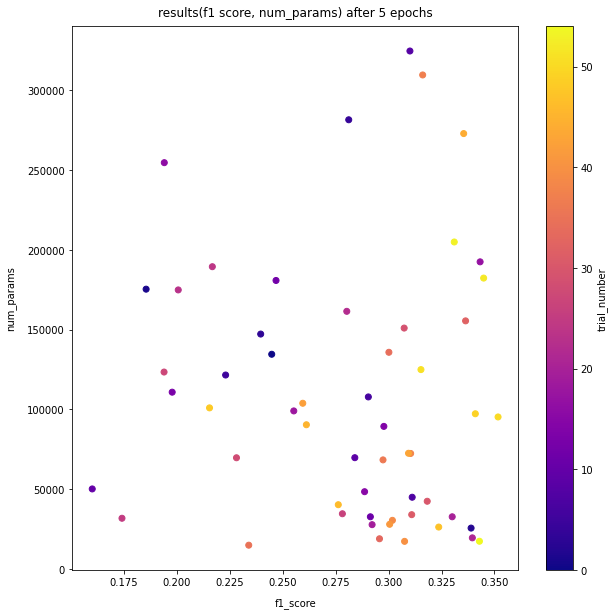

In [200]:
show_result(df, mode = 0)